#Labwork5
#Working on shapefile (continued)


In [ ]:
!pip install netCDF4
!pip install basemap

In [ ]:
!pip install cartopy

In [ ]:
import shapefile
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize
from numpy import *
from mpl_toolkits.basemap import Basemap
from netCDF4 import *
from matplotlib.path import Path


In [ ]:
# #----#----#----#----#----#----#
# # READ A SHAPEFILE (CONTINUE)
# #----#----#----#----#----#----#



# # Open the shapefile using the pyshp library
# sf = shapefile.Reader("/content/drive/MyDrive/USTH/Data visualization/gadm41_VNM_shp/gadm41_VNM_1.shp")

# # Get the shapefile records
# records = sf.records()

# # Try to print the first two records
# print ((records[0:2]))

# # Extract province names (I guess the record 4 is the name of the provinces)
# province_names = [record[4] for record in records]

# # Now check if we extract the correct records :))
# print (province_names)


In [ ]:
# #----#----#----#----#----#----#
# # DRAW A COLOR-CODED SHAPEFILE
# #----#----#----#----#----#----#

# # Fake data about the GRDP :))
# population = arange(1, 64, 1)

# # Create a figure and axis
# fig, ax = plt.subplots(1, figsize=(12, 8))

# # Add basemap
# map2 = Basemap(projection='merc',llcrnrlon=100,llcrnrlat=8,
#     urcrnrlon=110,urcrnrlat=24,resolution='l',epsg=4326)


# parallels = arange(-180.,180, 3) 	#lat
# meridians = arange(-180.,180., 3)
# map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
# map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)




# # Normalize the  data for coloring
# norm = Normalize(vmin=min(population), vmax=max(population))

# # Loop through the shapefile geometries and attributes to plot the map
# for shape, pop in zip(sf.shapes(), population):
#     poly = Polygon(shape.points, fill=True, edgecolor='k', facecolor=plt.cm.YlOrRd(norm(pop)))
#     ax.add_patch(poly)

# # Set the title and labels
# ax.set_title('GRDP Distribution in Vietnam by Province')


# ax.set_xlim(100, 120)
# ax.set_ylim(8, 24)

# # Create a colorbar
# sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Population')

# # Show the map
# plt.show()



# EX 1:
# The figure below has some problems. Fix it by yourself.
# Problem 1: island missing
# Problem 2: the size of the map, the parallel and meridiornal grid.
# Problem 3: some weird lines in the map, especially when we have islands.  


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path='/content/drive/MyDrive/Data Visualization/d02_2019-11-12_sample.nc'
island_path='/content/drive/MyDrive/Data Visualization/Islands/haidao'
vietnam_province_path='/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_1.shp'
vietnam_province_path1='/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_0.shp'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#----#----#----#----#----#----#
# EX1: PUT YOUR CODE HERE
#----#----#----#----#----#----#




# Open the shapefile using the pyshp library
sf = shapefile.Reader(vietnam_province_path)

# Get the shapefile records
records = sf.records()

# Try to print the first two records
print ((records[0:2]))

# Extract province names (I guess the record 4 is the name of the provinces)
province_names = [record[4] for record in records]

# Now check if we extract the correct records :))
print (province_names)



[Record #0: ['VNM.1_1', 'VNM', 'Vietnam', 'An Giang', 'An Giang', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.AG', 'VN-44'], Record #1: ['VNM.7_1', 'VNM', 'Vietnam', 'Bà Rịa - Vũng Tàu', 'Ba Ria - Vung Tau', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.BV', 'NA']]
['An Giang', 'Ba Ria - Vung Tau', 'Bac Giang', 'Bac Kan', 'Bac Lieu', 'Bac Ninh', 'Ben Tre', 'Binh Dinh', 'Binh Duong', 'Binh Phuoc', 'Binh Thuan', 'Ca Mau', 'Can Tho', 'Cao Bang', 'Da Nang', 'Dak Lak', 'Dak Nong', 'Dien Bien', 'Dong Nai', 'Dong Thap', 'Gia Lai', 'Ha Giang', 'Ha Nam', 'Ha Noi', 'Ha Tinh', 'Hai Duong', 'Hai Phong', 'Hau Giang', 'Ho Chi Minh', 'Hoa Binh', 'Hung Yen', 'Khanh Hoa', 'Kien Giang', 'Kon Tum', 'Lai Chau', 'Lam Dong', 'Lang Son', 'Lao Cai', 'Long An', 'Nam Dinh', 'Nghe An', 'Ninh Binh', 'Ninh Thuan', 'Phu Tho', 'Phu Yen', 'Quang Binh', 'Quang Nam', 'Quang Ngai', 'Quang Ninh', 'Quang Tri', 'Soc Trang', 'Son La', 'Tay Ninh', 'Thai Binh', 'Thai Nguyen', 'Thanh Hoa', 'Thua Thien Hue', 'Tien Giang', 'Tra Vinh', 'Tuyen Quan

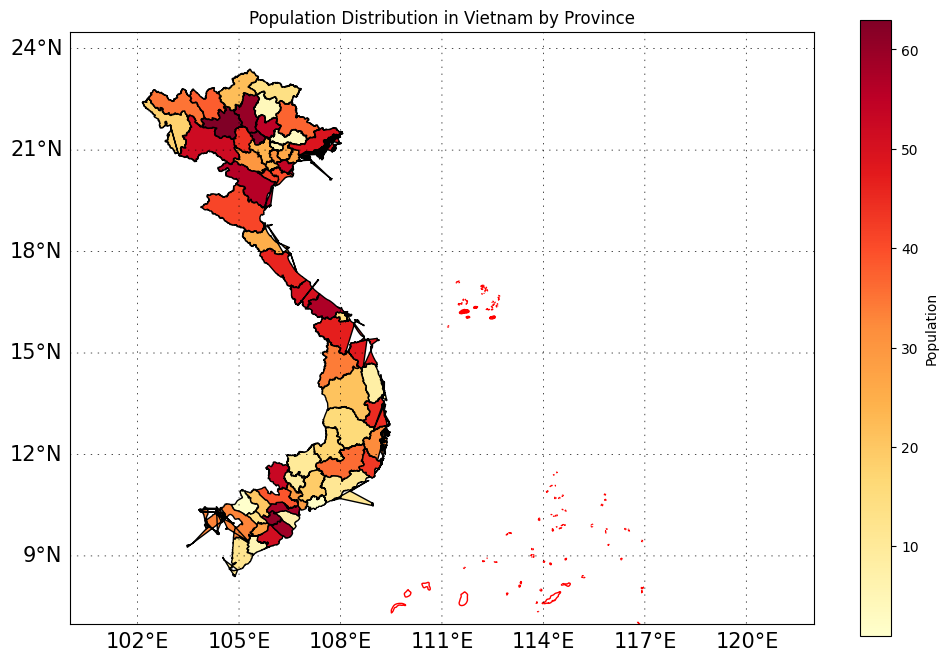

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize
import shapefile
import numpy as np

# Define the bounding box coordinates for Vietnam
lon_min = 100
lon_max = 122
lat_min = 7
lat_max = 24.5

# Read the shapefile
sf = shapefile.Reader(vietnam_province_path)

population = np.arange(1, 64, 1)

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

# Add basemap
map2 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
               urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', epsg=4326)

# Draw parallels and meridians
parallels = np.arange(-180., 180, 3)
meridians = np.arange(-180., 180., 3)
map2.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15, zorder=12)
map2.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15, zorder=12)

# Read and draw islands
map2.readshapefile(island_path, 'haidao', linewidth=1, color='red')

# Normalize the data for coloring
norm = Normalize(vmin=min(population), vmax=max(population))

# Loop through the shapefile geometries and attributes to plot the map
for shape, pop in zip(sf.shapes(), population):
    polygon = shape.points
    x, y = zip(*polygon)

    poly = Polygon(list(zip(x, y)), fill=True, edgecolor='k', facecolor=plt.cm.YlOrRd(norm(pop)))
    ax.add_patch(poly)

# Set the title and labels
ax.set_title('Population Distribution in Vietnam by Province')
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population')

# Show the map
plt.show()

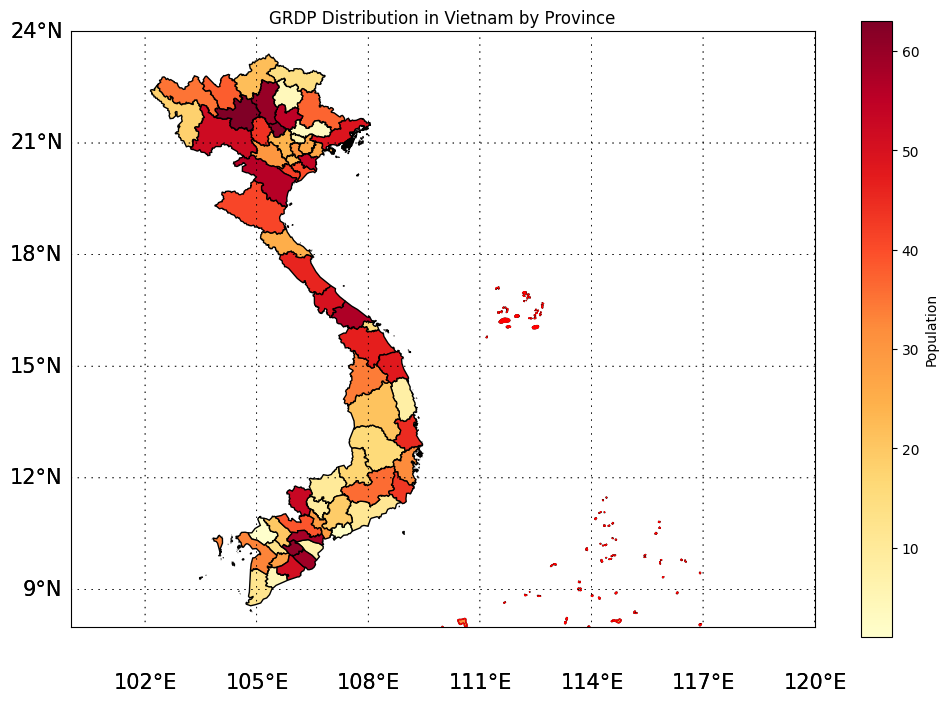

In [ ]:
import shapefile
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize
from numpy import arange
from shapely.geometry import shape


# Open the shapefile using the pyshp library
sf = shapefile.Reader(vietnam_province_path)

# Get the shapefile records
records = sf.records()

# Extract province names (I guess the record 4 is the name of the provinces)
province_names = [record[4] for record in records]

# Fake data about the GRDP
population = arange(1, 64, 1)

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

# Add basemap

map2 = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
               urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='l', epsg=4326)

parallels = arange(-180., 180, 3)  # lat
meridians = arange(-180., 180., 3)
map2.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15, zorder=12)  # left, right, top or bottom
map2.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15, zorder=12)

# Normalize the data for coloring
norm = Normalize(vmin=min(population), vmax=max(population))

for i, shape_record in enumerate(sf.iterShapeRecords()):
    geom = shape(shape_record.shape.__geo_interface__)  # Corrected this line
    rec = shape_record.record
    pop = population[i]

    # Use Shapely to simplify the polygon directly on the geometry
    simplified_geom = geom.simplify(0.01, preserve_topology=True)  # Adjust the tolerance as needed

    if simplified_geom.geom_type == 'Polygon':
        # Plot the simplified polygon
        poly = Polygon(simplified_geom.exterior.coords, fill=True, edgecolor='k', facecolor=plt.cm.YlOrRd(norm(pop)))
        ax.add_patch(poly)
    elif simplified_geom.geom_type == 'MultiPolygon':
        # If it's a MultiPolygon, iterate through its parts and plot each one
        for part in simplified_geom.geoms:
            poly = Polygon(part.exterior.coords, fill=True, edgecolor='k', facecolor=plt.cm.YlOrRd(norm(pop)))
            ax.add_patch(poly)


# Set the title and labels
parallels = np.arange(-180., 180, 3)
meridians = np.arange(-180., 180., 3)
map2.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=15, zorder=12)
map2.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=15, zorder=12)

# Read and draw islands
map2.readshapefile(island_path, 'haidao', linewidth=1, color='red')
median_population = (min(population) + max(population)) / 2

for shape_info, shape_polygon in zip(map2.haidao_info, map2.haidao):
    poly = Polygon(shape_polygon, fill=True, edgecolor='k', facecolor=plt.cm.YlOrRd(norm(median_population)))
    ax.add_patch(poly)
ax.set_title('GRDP Distribution in Vietnam by Province')

ax.set_xlim(100, 120)
ax.set_ylim(8, 24)

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population')

# Show the map
plt.show()


# ANOTHER LIBRARY....

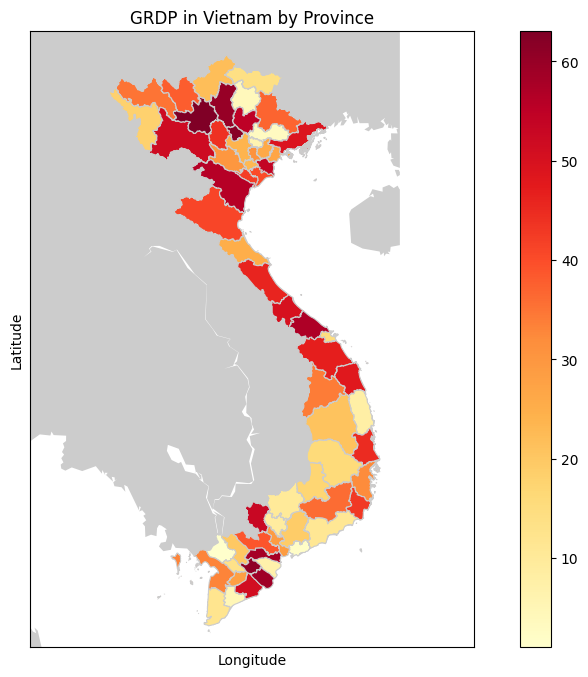

In [ ]:
#----#----#----#----#----#----#
# LET'S TRY WITH GEOPANDA
#----#----#----#----#----#----#
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a shapefile of Vietnam's provinces (replace with a real shapefile)
vietnam = gpd.read_file(vietnam_province_path)

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

map2 = Basemap(projection='merc',llcrnrlon=100,llcrnrlat=8,
    urcrnrlon=110,urcrnrlat=24,resolution='l',epsg=4326)

map2.fillcontinents()


# Plot the map with color-coded provinces
vietnam.plot(column=population, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the title and labels
ax.set_title('GRDP in Vietnam by Province')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


ax.set_xlim(100., 112)
ax.set_ylim(8, 24)
# Show the map
plt.show()

#This map does not have meridians (lines of longitude) and parallels (lines of latitude) yet. Add it by yourself (and add the islands also...)

#EX2
# Problem 1: This map does not have meridians (lines of longitude) and parallels (lines of latitude) yet. Add it
# Problem 2: add the islands also..
# Problem 3: Change the min and max of colorbar to min = 0, max = 70

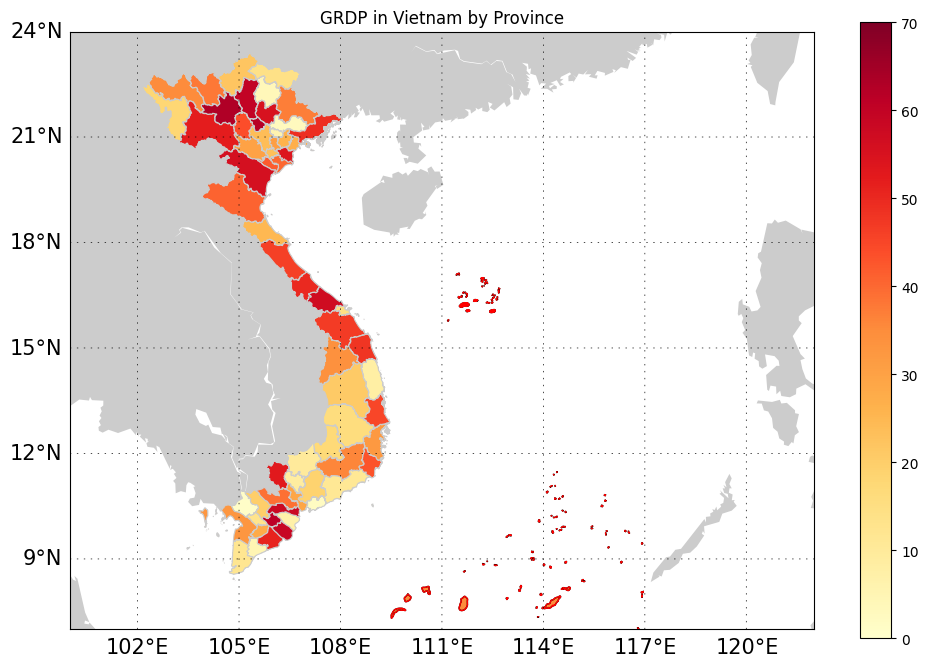

In [ ]:
#----#----#----#----#----#----#
# EX2: PUT YOUR CODE HERE
#----#----#----#----#----#----#

#----#----#----#----#----#----#
# LET'S TRY WITH GEOPANDA
#----#----#----#----#----#----#
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a shapefile of Vietnam's provinces (replace with a real shapefile)
vietnam = gpd.read_file(vietnam_province_path)

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

map3 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='l',epsg=4326)

map3.fillcontinents()
parallels = arange(-180.,180, 3)
meridians = arange(-180.,180., 3)
map3.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12)
map3.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)
map3.readshapefile(island_path, 'haidao',linewidth=1, color='red')
median_population = (min(population) + max(population)) / 2
for shape_info, shape_polygon in zip(map3.haidao_info, map3.haidao):
    poly = Polygon(shape_polygon, fill=True, edgecolor='k', facecolor=plt.cm.YlOrRd(norm(median_population)))
    ax.add_patch(poly)
vietnam.plot(column=population,cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,vmin=0,vmax=70)

# Set the title and labels
ax.set_title('GRDP in Vietnam by Province')
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')


ax.set_xlim(100., 122)
ax.set_ylim(7, 24)
# Show the map
plt.show()


#################################

---
---

In [ ]:
# #----#----#----#----#----#----#
# # NOW WITH THE DATA
# #----#----#----#----#----#----#

# x_axis = arange(101, 110, 0.05)
# y_axis = arange(8, 24, 0.05)

# x_axis, y_axis = meshgrid(x_axis, y_axis)
# random.seed(seed=180793)
# data = random.randint(1, 1000, size = (size(x_axis,0), size(x_axis, 1)))


# # Create a figure and axis
# fig, ax = plt.subplots(1, figsize=(12, 8))

# map2 = Basemap(projection='merc',llcrnrlon=100,llcrnrlat=7,
#     urcrnrlon=111,urcrnrlat=25,resolution='l',epsg=4326)

# map2.fillcontinents()
# plt.pcolormesh(x_axis, y_axis, data, cmap = 'YlGn')

# map2.readshapefile('/content/drive/MyDrive/USTH/Data visualization/gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',
# 	linewidth=2, color='white')

# map2.readshapefile('/content/drive/MyDrive/USTH/Data visualization/gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',
# 	linewidth=0.2, color='r')

# # Set the title and labels
# ax.set_title('GRDP in Vietnam by Province')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# plt.colorbar()

# # Show the map
# plt.show()


---
#EX3:
# Problem 1: calculate mean value of points inside the shapefile for each province
# Problem 2: plot it on map
---


![link text](https://i.imgur.com/iK9Jpf5.png)





.

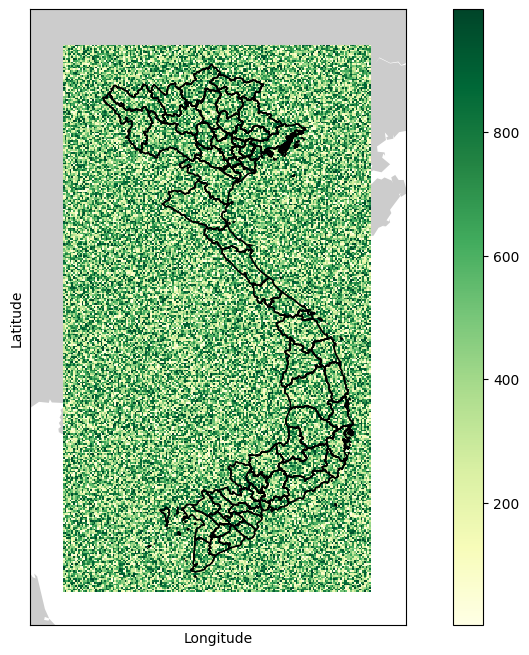

In [ ]:
#----#----#----#----#----#----#
# EX3: PUT YOUR CODE HERE
#----#----#----#----#----#----#


x_axis = arange(101, 110, 0.05)
y_axis = arange(8, 24, 0.05)

x_axis, y_axis = meshgrid(x_axis, y_axis)
random.seed(seed=180793)
data = random.randint(1, 1000, size = (size(x_axis,0), size(x_axis, 1)))


# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

map2 = Basemap(projection='merc',llcrnrlon=100,llcrnrlat=7,
    urcrnrlon=111,urcrnrlat=25,resolution='l',epsg=4326)

map2.fillcontinents()
plt.pcolormesh(x_axis, y_axis, data, cmap = 'YlGn')

map2.readshapefile('/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_1','gadm41_VNM_1',
    linewidth=1, color='k')

map2.readshapefile('/content/drive/MyDrive/Data Visualization/VNM_shp/gadm41_VNM_1','gadm41_VNM_1',
    linewidth=1, color='k')

# Set the title and labels

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.colorbar()

plt.show()
shapes = sf.shapes()
x_axis = np.arange(101, 110, 0.05)
y_axis = np.arange(8, 24, 0.05)
x_axis, y_axis = np.meshgrid(x_axis, y_axis)
means_each_province = []
# calculate mean value of points inside the shapefile for each province
for i, shape in enumerate(shapes):
    path = Path(shape.points)
    mask = path.contains_points(np.vstack((x_axis.flatten(), y_axis.flatten())).T)
    mean = data.flatten()[mask].mean()
    means_each_province.append(mean)

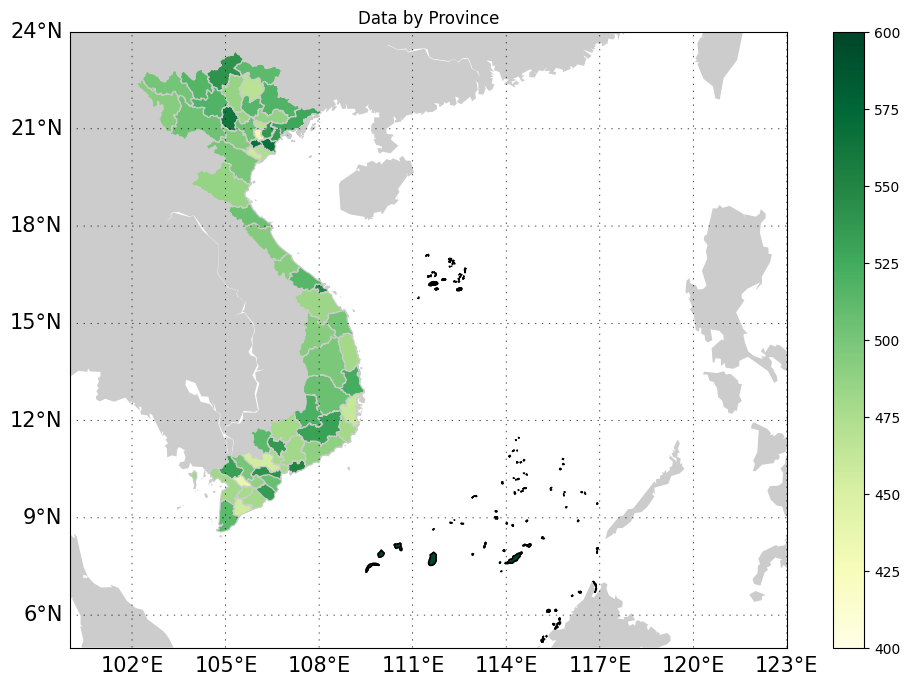

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load a shapefile of Vietnam's provinces (replace with a real shapefile)
vietnam = gpd.read_file(vietnam_province_path)

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))
map4 = Basemap(projection='merc',llcrnrlon=100,llcrnrlat=5,
    urcrnrlon=123,urcrnrlat=25,resolution='l',epsg=4326)
parallels = arange(-180.,180, 3) 	#lat
meridians = arange(-180.,180., 3)
map4.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map4.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

map4.fillcontinents()

cbar_ticks = np.arange(400, 625, 25)
vietnam.plot(column=np.array(means_each_province), cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=400, vmax=600)
map4.readshapefile(island_path, 'haidao',linewidth=1, color='k')
median_mean_value = (400 + 600) / 2
for shape_info, shape_polygon in zip(map4.haidao_info, map4.haidao):
    poly = Polygon(shape_polygon, fill=True, edgecolor='k', facecolor=plt.cm.YlGn(norm(median_mean_value)))
    ax.add_patch(poly)


ax.set_title('Data by Province')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
ax.set_xlim(100., 123)
ax.set_ylim(5, 24)

# Show the map
plt.show()


---

#EX4:
#The data below is the salary per month of 10 people from 1980 - 2018.
# Plot the revenue
# Check the linear trend. Plot a straight line to show the trend
# Check if the trend is significant (p<0.05) or not. Yes = solid line, No = dashed line

![link text](https://i.imgur.com/zg8qlOd.png)



In [ ]:
'''
A = [10.  6.  8.  9.  4.  5.  9.  9.  3.  9.  5.  9.  7.  9.  5.  5.  8.  2.
  8.  4.  3. 12.  5.  7.  4.  7.  6.  8.  4.  8.  9.  6. 14.  5. 11. 14.
 17.  6.  5.]
B = [ 5.  6.  8. 12.  2.  7.  5.  7.  4.  7.  4.  2.  4.  5.  0.  7.  7.  2.
  5.  3.  2.  5.  3. 12.  7.  8.  2.  7.  2.  4.  7.  7.  4. 10.  4.  7.
  8.  7.  6.]
C = [10.  5.  3.  6.  5.  6.  2.  7.  5.  3.  3.  1.  4.  9.  4.  7.  3.  4.
  2.  3.  0.  5.  2.  7.  0.  6.  4.  7.  6.  4. 10.  7.  2.  5.  3.  6.
  7.  2.  1.]
D = [4. 6. 4. 7. 3. 7. 3. 6. 9. 2. 4. 2. 2. 3. 0. 8. 9. 4. 9. 6. 6. 4. 6. 2.
 2. 9. 2. 6. 4. 6. 7. 7. 3. 5. 9. 6. 6. 7. 4.]

E = [ 3.  3.  1.  3.  2.  4.  5.  1.  5.  3.  6.  3.  1.  4.  3.  6.  7.  7.
 10.  4.  1.  7.  9.  3.  2. 12.  4.  7.  3.  6.  9.  7.  7.  8.  9.  5.
  9.  8. 12.]
F = [ 2.  7.  5.  5.  4. 13.  7.  7.  8.  3. 10.  6.  4.  9.  5. 14.  4. 13.
  9.  6.  2.  6. 10.  1.  2.  9.  0.  8.  5.  4.  7.  5.  4.  4.  5.  5.
  9.  1.  5.]
G = [ 2. 10.  2.  2.  1.  6.  1. 11.  4.  6. 10.  6.  9. 10.  4.  4.  4. 11.
 13.  6.  2. 10.  7.  4.  4.  5.  3.  1.  3.  3. 10.  1.  7.  2.  3.  8.
  5.  6.  5.]
H = [ 4.  5.  4.  5.  3.  1.  4.  6.  5.  3.  6.  2.  3.  3.  3. 13.  3.  3.
 13.  8.  9.  7.  6.  8.  2. 13. 13. 11.  9.  6. 12.  6.  7. 12. 13. 11.
 12. 15. 10.]
I = [ 6.  3.  0.  4.  0.  3.  3.  3.  1.  1. 10.  0.  6.  7.  2.  4.  1.  2.
 10.  4.  4.  3. 10.  5.  9.  7.  4.  9.  2.  6.  8.  2.  8.  8. 14. 20.
 16. 19. 13.]
J = [ 8.  7.  2.  7.  1.  4.  4.  7.  7.  4.  7.  2. 12. 12.  7. 13.  5. 10.
 11.  1.  1.  3.  6.  4.  6.  4.  4.  3.  0.  1. 10.  3.  6.  5.  1.  4.
  1.  4.  8.]
'''


'\nA = [10.  6.  8.  9.  4.  5.  9.  9.  3.  9.  5.  9.  7.  9.  5.  5.  8.  2.\n  8.  4.  3. 12.  5.  7.  4.  7.  6.  8.  4.  8.  9.  6. 14.  5. 11. 14.\n 17.  6.  5.]\nB = [ 5.  6.  8. 12.  2.  7.  5.  7.  4.  7.  4.  2.  4.  5.  0.  7.  7.  2.\n  5.  3.  2.  5.  3. 12.  7.  8.  2.  7.  2.  4.  7.  7.  4. 10.  4.  7.\n  8.  7.  6.]\nC = [10.  5.  3.  6.  5.  6.  2.  7.  5.  3.  3.  1.  4.  9.  4.  7.  3.  4.\n  2.  3.  0.  5.  2.  7.  0.  6.  4.  7.  6.  4. 10.  7.  2.  5.  3.  6.\n  7.  2.  1.]\nD = [4. 6. 4. 7. 3. 7. 3. 6. 9. 2. 4. 2. 2. 3. 0. 8. 9. 4. 9. 6. 6. 4. 6. 2.\n 2. 9. 2. 6. 4. 6. 7. 7. 3. 5. 9. 6. 6. 7. 4.]\n\nE = [ 3.  3.  1.  3.  2.  4.  5.  1.  5.  3.  6.  3.  1.  4.  3.  6.  7.  7.\n 10.  4.  1.  7.  9.  3.  2. 12.  4.  7.  3.  6.  9.  7.  7.  8.  9.  5.\n  9.  8. 12.]\nF = [ 2.  7.  5.  5.  4. 13.  7.  7.  8.  3. 10.  6.  4.  9.  5. 14.  4. 13.\n  9.  6.  2.  6. 10.  1.  2.  9.  0.  8.  5.  4.  7.  5.  4.  4.  5.  5.\n  9.  1.  5.]\nG = [ 2. 10.  2.  2.  1.  6.  1. 1

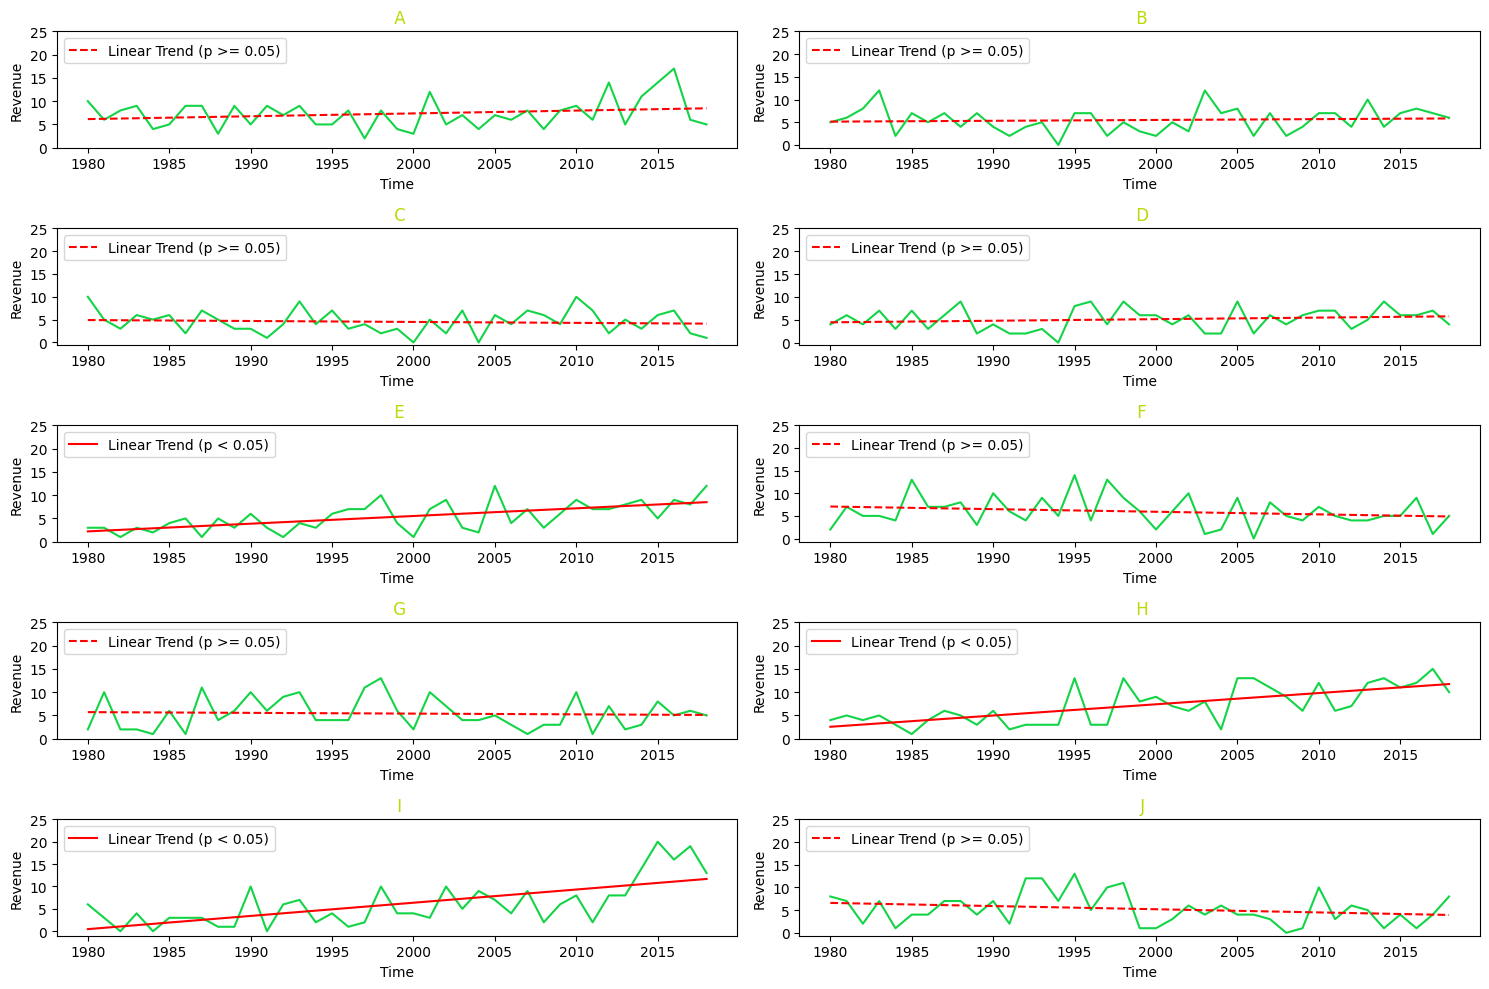

In [ ]:
#----#----#----#----#----#----#
# EX4: PUT YOUR CODE HERE
#----#----#----#----#----#----#
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

revenue_sets = [np.array([10., 6., 8., 9., 4., 5., 9., 9., 3., 9., 5., 9., 7., 9., 5., 5., 8., 2., 8., 4., 3., 12., 5., 7., 4., 7., 6., 8., 4., 8., 9., 6., 14., 5., 11., 14.,17., 6., 5.]),
                np.array([5.,  6.,  8., 12.,  2.,  7.,  5.,  7.,  4.,  7.,  4.,  2.,  4.,  5.,  0.,  7.,  7.,  2., 5.,  3.,  2.,  5.,  3., 12.,  7.,  8.,  2.,  7.,  2.,  4.,  7.,  7.,  4., 10.,  4.,  7., 8.,  7.,  6.,]),
                np.array([10.,  5.,  3.,  6.,  5.,  6.,  2.,  7.,  5.,  3.,  3.,  1.,  4.,  9.,  4.,  7.,  3.,  4., 2.,  3.,  0.,  5.,  2.,  7.,  0.,  6.,  4.,  7.,  6.,  4., 10.,  7.,  2.,  5.,  3.,  6., 7.,  2.,  1.,]),
                np.array([4., 6., 4., 7., 3., 7., 3., 6., 9., 2., 4., 2., 2., 3., 0., 8., 9., 4., 9., 6., 6., 4., 6., 2., 2., 9., 2., 6., 4., 6., 7., 7., 3., 5., 9., 6., 6., 7., 4.,]),
                np.array([ 3.,  3.,  1.,  3.,  2.,  4.,  5.,  1.,  5.,  3.,  6.,  3.,  1.,  4.,  3.,  6.,  7.,  7., 10.,  4.,  1.,  7.,  9.,  3.,  2., 12.,  4.,  7.,  3.,  6.,  9.,  7.,  7.,  8.,  9.,  5., 9.,  8., 12.,]),
                np.array([ 2.,  7.,  5.,  5.,  4., 13.,  7.,  7.,  8.,  3., 10.,  6.,  4.,  9.,  5., 14.,  4., 13., 9.,  6.,  2.,  6., 10.,  1.,  2.,  9.,  0.,  8.,  5.,  4.,  7.,  5.,  4.,  4.,  5.,  5., 9.,  1.,  5.,]),
                np.array([ 2., 10.,  2.,  2.,  1.,  6.,  1., 11.,  4.,  6., 10.,  6.,  9., 10.,  4.,  4.,  4., 11.,  13.,  6.,  2., 10.,  7.,  4.,  4.,  5.,  3.,  1.,  3.,  3., 10.,  1.,  7.,  2.,  3.,  8., 5.,  6.,  5.,]),
                np.array([ 4.,  5.,  4.,  5.,  3.,  1.,  4.,  6.,  5.,  3.,  6.,  2.,  3.,  3.,  3., 13.,  3.,  3.,  13.,  8.,  9.,  7.,  6.,  8.,  2., 13., 13., 11.,  9.,  6., 12.,  6.,  7., 12., 13., 11., 12., 15., 10.,]),
                np.array([ 6.,  3.,  0.,  4.,  0.,  3.,  3.,  3.,  1.,  1., 10.,  0.,  6.,  7.,  2.,  4.,  1.,  2., 10.,  4.,  4.,  3., 10.,  5.,  9.,  7.,  4.,  9.,  2.,  6.,  8.,  2.,  8.,  8., 14., 20., 16., 19., 13.,]),
                np.array([ 8.,  7.,  2.,  7.,  1.,  4.,  4.,  7.,  7.,  4.,  7.,  2., 12., 12.,  7., 13.,  5., 10., 11.,  1.,  1.,  3.,  6.,  4.,  6.,  4.,  4.,  3.,  0.,  1., 10.,  3.,  6.,  5.,  1.,  4., 1.,  4.,  8.,]),
                ]

# Create an array for the x-axis (time or observation index)
time = np.arange(len(revenue_sets[0]))

# Create a list of labels for the legend
legend_labels = []
name_person=['A','B','C','D','E','F','G','H','I','J']

fig, axs = plt.subplots(5, 2, figsize=(15, 10))

# Flatten the axs array to make it easier to access each subplot
axs = axs.flatten()

for i, (revenue, ax) in enumerate(zip(revenue_sets, axs)):
    # Plot each set of data
    ax.plot(time, revenue, linestyle='-',color='#13d446')

    # Calculate the linear trend for each set
    slope, intercept, r_value, p_value, _ = stats.linregress(time, revenue)

    # Check if the trend is significant (p < 0.05) and update the trend line style
    if p_value < 0.05:
        trend_label = f'Linear Trend (p < 0.05)'
        trend_linestyle = 'solid'
    else:
        trend_label = f'Linear Trend (p >= 0.05)'
        trend_linestyle = 'dashed'

    # Add the trend line to the subplot
    ax.plot(time, slope * time + intercept, linestyle=trend_linestyle, color='r', label=trend_label)

    # Append the trend line label to the legend_labels list
    legend_labels.append(trend_label)

    # Set subplot title and labels
    ax.set_title(f' {name_person[i]}',color='#bcd904')
    ax.set_xlabel('Time')
    ax.set_ylabel('Revenue')
    years = np.arange(1980, 2016, 1)
    ax.set_xticks(time[::5])  # Set ticks at the same positions as the original data
    ax.set_xticklabels(years[::5])  # Set tick labels to the years
    #ax.set_xticks([1980, 1985, 1990, 1995, 2000,2005,2010,2015,2020])
    ax.set_yticks([0, 5, 10, 15, 20,25])

    # Add a legend to each subplot
    ax.legend(loc='upper left')

# Adjust the spacing between subplots for better readability
plt.tight_layout()

# Show the figure with all subplots
plt.show()
#################################